# Overview

Given the Ames Housing data, predict the final price of each home

In [82]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew, norm
import statsmodels.api as sm
from sklearn.neighbors import KNeighborsRegressor

In [83]:
#Importing data

house_data = pd.read_csv("./AmesHousing.csv")
test = pd.read_csv("./test.csv")
train = pd.read_csv("./train.csv")
data_w = house_data.copy()

data_w.columns = data_w.columns.str.replace(" ", "")

data_w.info

<bound method DataFrame.info of       Order        PID  MSSubClass MSZoning  LotFrontage  LotArea Street  \
0         1  526301100          20       RL        141.0    31770   Pave   
1         2  526350040          20       RH         80.0    11622   Pave   
2         3  526351010          20       RL         81.0    14267   Pave   
3         4  526353030          20       RL         93.0    11160   Pave   
4         5  527105010          60       RL         74.0    13830   Pave   
...     ...        ...         ...      ...          ...      ...    ...   
2925   2926  923275080          80       RL         37.0     7937   Pave   
2926   2927  923276100          20       RL          NaN     8885   Pave   
2927   2928  923400125          85       RL         62.0    10441   Pave   
2928   2929  924100070          20       RL         77.0    10010   Pave   
2929   2930  924151050          60       RL         74.0     9627   Pave   

     Alley LotShape LandContour  ... PoolArea PoolQC  F

In [84]:
data_w.head()

,Order,PID,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


C:\Users\NicholasTeng\AppData\Local\Temp\ipykernel_4156\1683444937.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_w["SalePrice"],fit=norm)
c:\Users\NicholasTeng\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\NicholasTeng\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert i

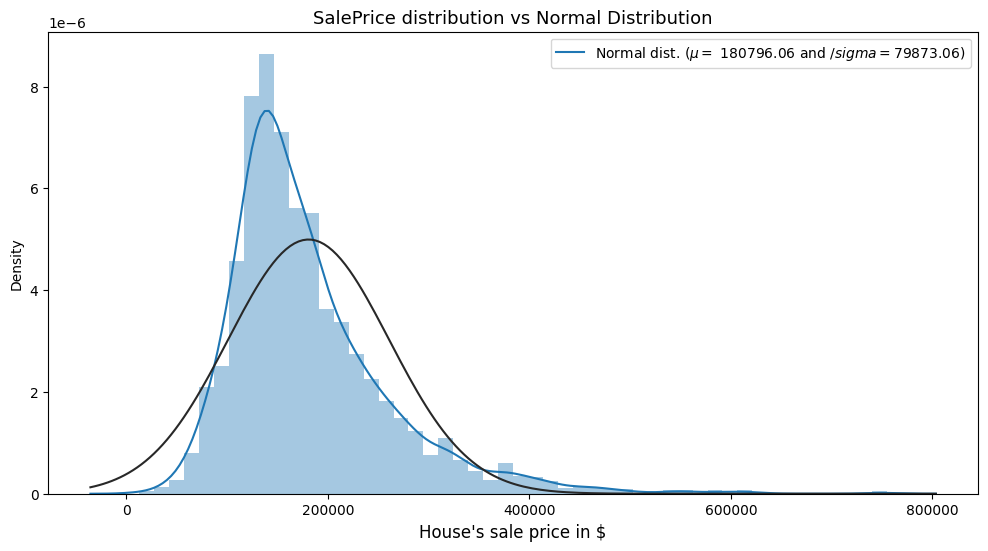

In [85]:
#Exploratory Data Analysis and Visualisation

(mu, sigma) = norm.fit(data_w["SalePrice"])
plt.figure(figsize = (12,6))

sns.distplot(data_w["SalePrice"],fit=norm)

plt.title("SalePrice distribution vs Normal Distribution", fontsize = 13)
plt.xlabel("House's sale price in $", fontsize = 12)
plt.legend(["Normal dist. ($\mu=$ {:.2f} and $/sigma=${:.2f})".format(mu, sigma)], loc = "best")
plt.show()

In [86]:
#Correlation



# What does this mean? Google it

In literature, acceptable values for skewness are between -0.5 and 0.5 while -2 and 2 for Kurtosis. Looking at the plot, we can clearly see how the distribution does not seem to be normal, but highly right-skewed. The non-normality of our distribution is also supported by the Shapiro test for normality (p-value really small that allows us to reject the hypotesis of normality). Despite that, let's leave it like that for now, we'll deal with that later in the notebook.


In [87]:
# Skew and kurt
from scipy import stats

shap_t,shap_p = stats.shapiro(data_w['SalePrice'])

print("Skewness: %f" % abs(data_w['SalePrice']).skew())
print("Kurtosis: %f" % abs(data_w['SalePrice']).kurt())
print("Shapiro_Test: %f" % shap_t)
print("Shapiro_Test: %f" % shap_p)

Skewness: 1.743500
Kurtosis: 5.118900
Shapiro_Test: 0.876261
Shapiro_Test: 0.000000


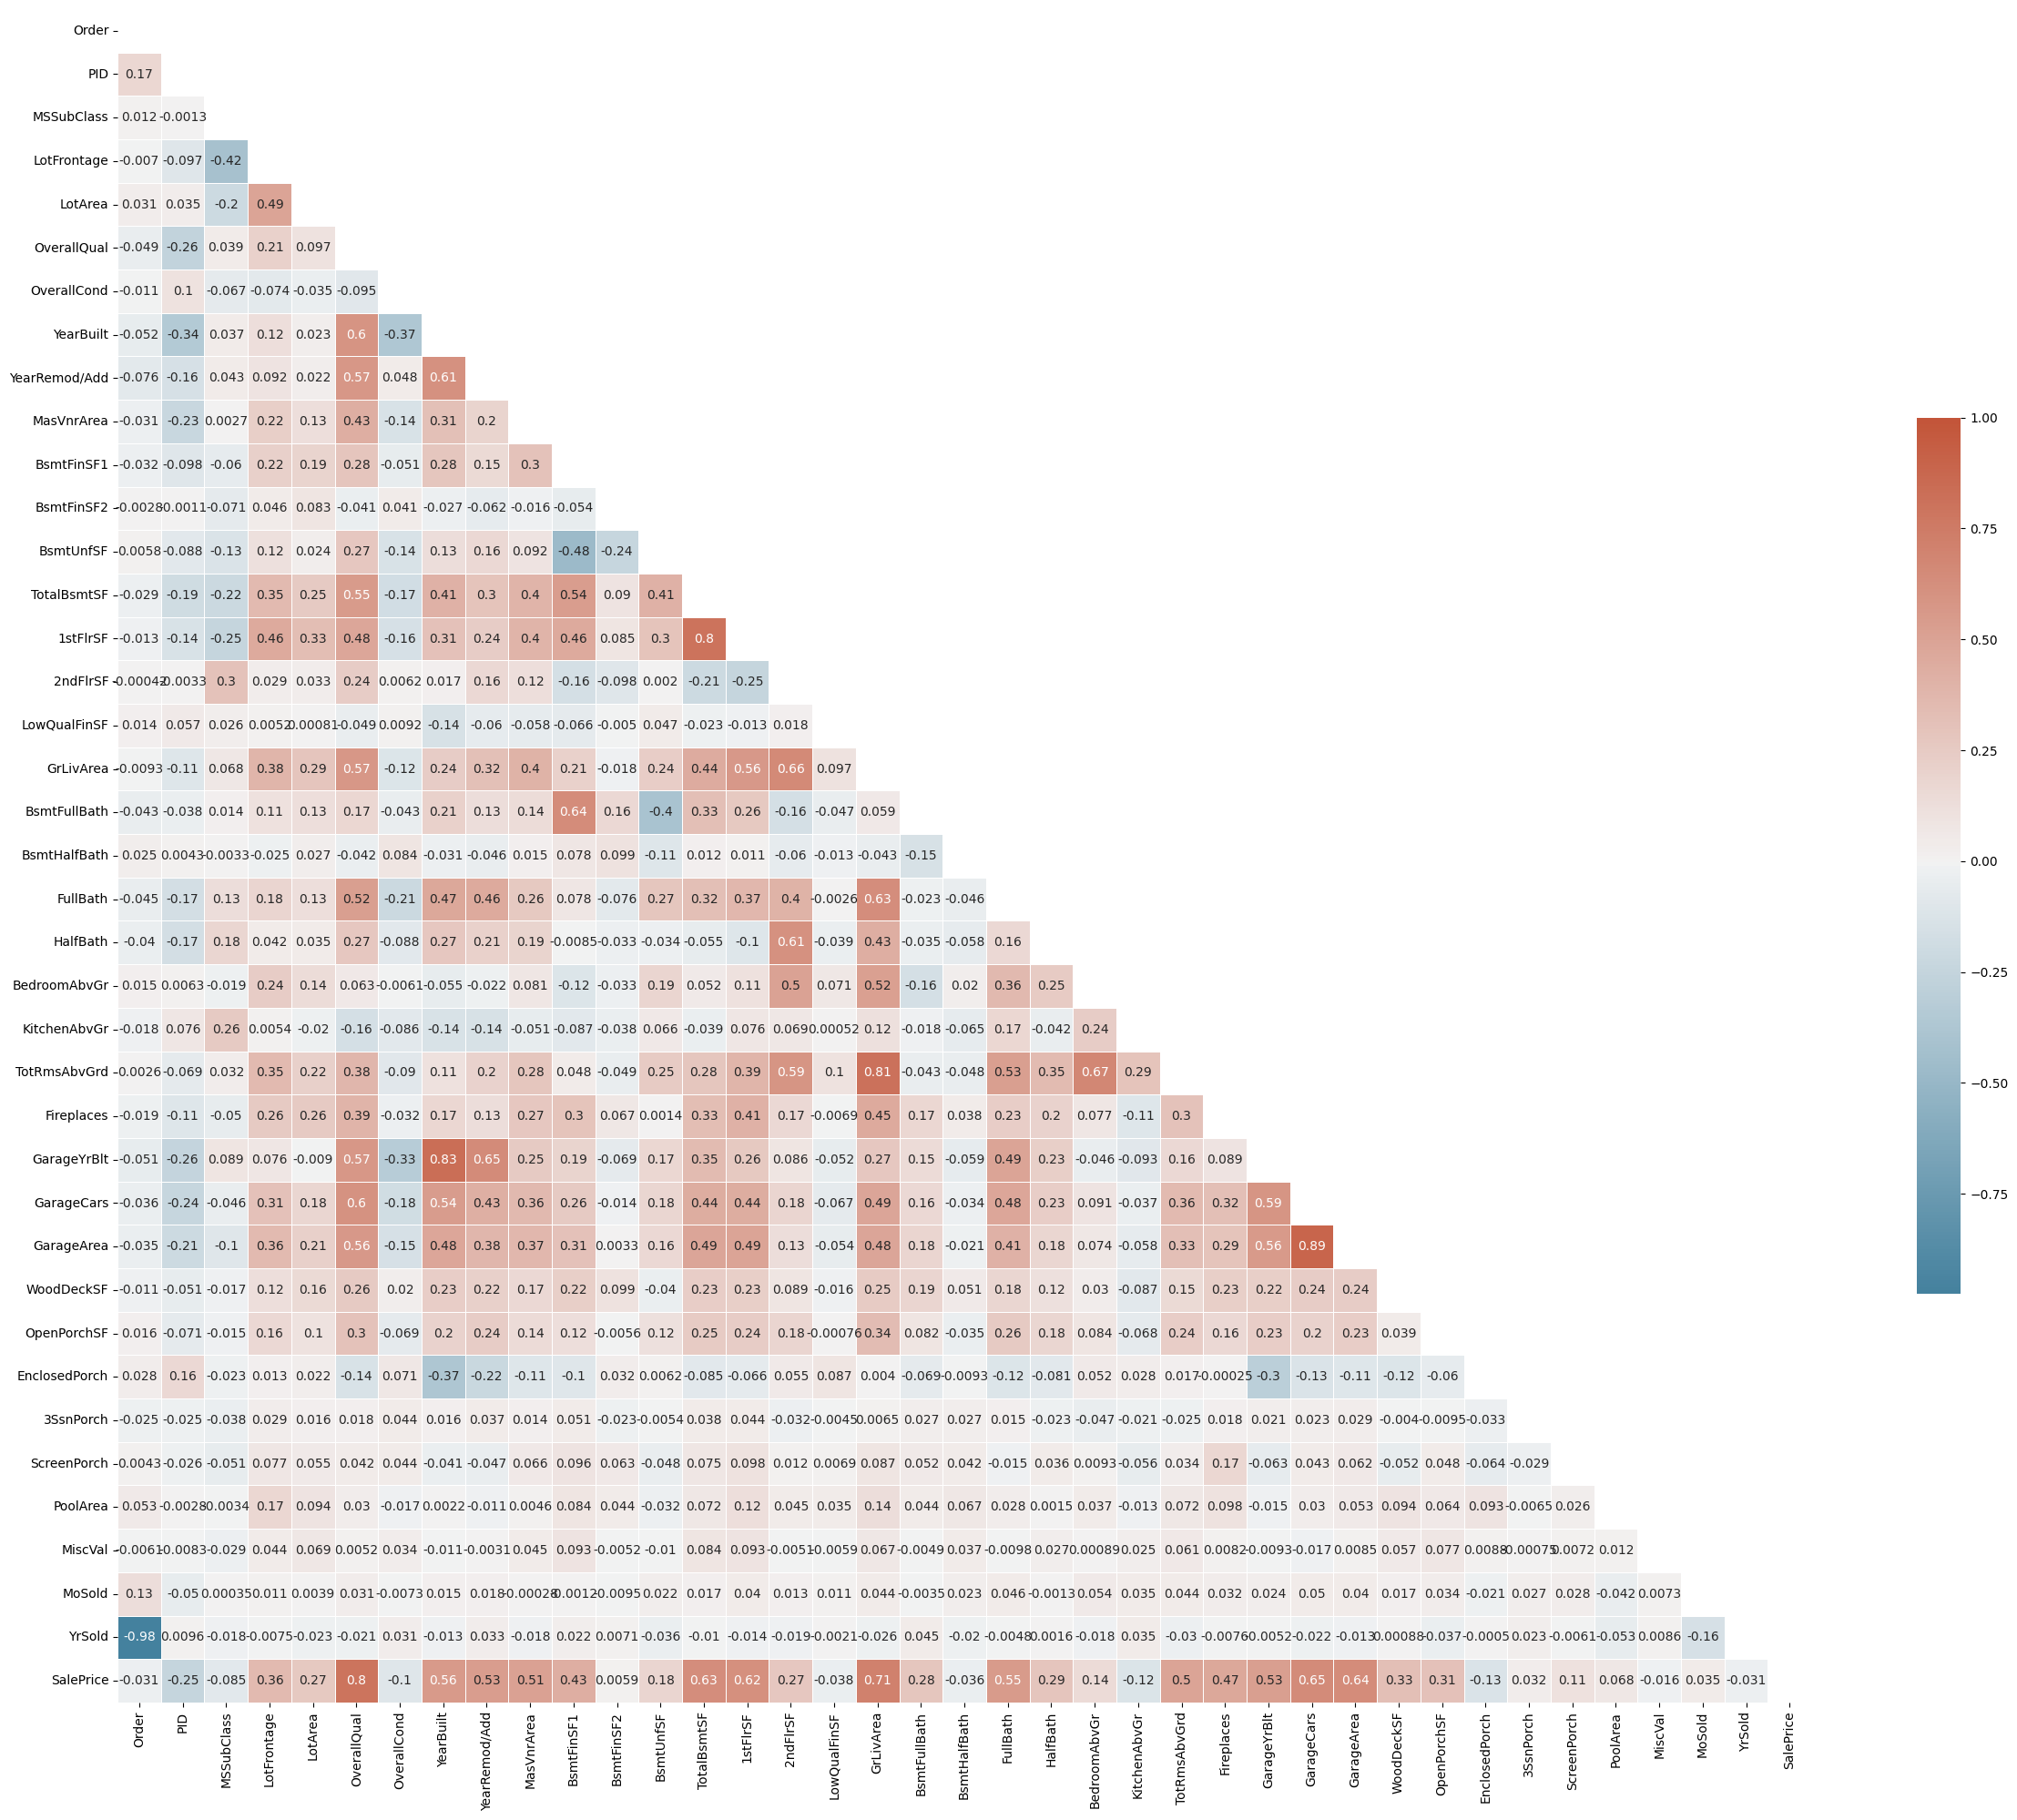

In [88]:
#Correlation Matrix


f, ax = plt.subplots(figsize=(30, 25))
numeric_data = data_w.select_dtypes(include=['number'])
mat = numeric_data.corr('pearson')
mask = np.triu(np.ones_like(mat, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(mat, mask=mask, cmap=cmap, vmax=1, center=0, annot = True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

From this, we can find which features correlates the most with the target, and then can investigate more in depth.

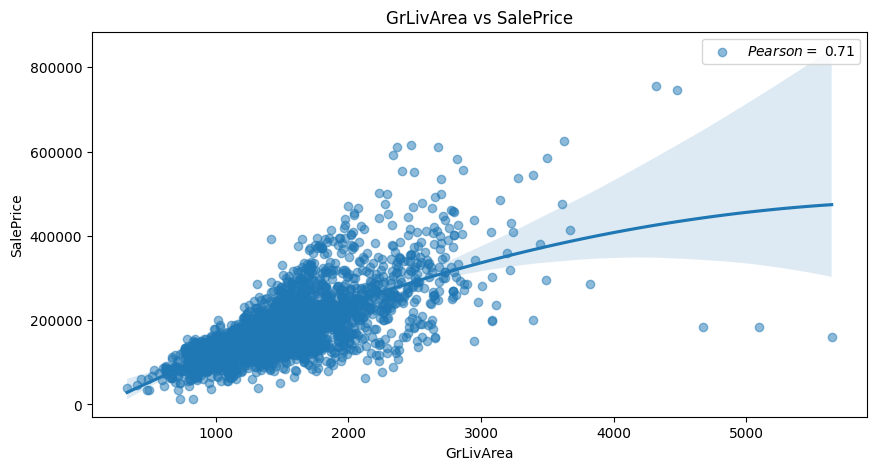

In [89]:
Pearson_GrLiv = 0.71
plt.figure(figsize = (10,5))
sns.regplot(data=data_w, x = 'GrLivArea', y='SalePrice', scatter_kws={'alpha':0.5}, order =2 )
plt.title('GrLivArea vs SalePrice', fontsize = 12)
plt.legend(['$Pearson=$ {:.2f}'.format(Pearson_GrLiv)], loc = 'best')
plt.show()

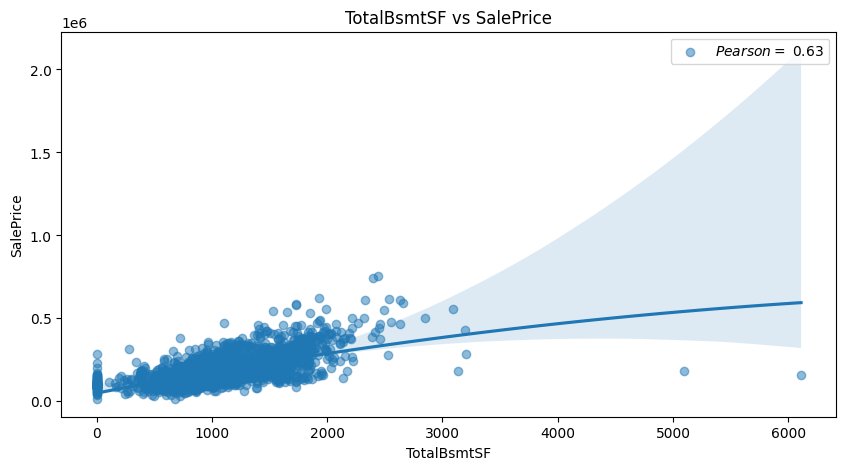

In [90]:
Pearson_TBSF = 0.63
plt.figure(figsize = (10,5))
sns.regplot(data = data_w, x = "TotalBsmtSF", y = "SalePrice", scatter_kws={"alpha": 0.5}, order =2 )
plt.title('TotalBsmtSF vs SalePrice', fontsize = 12)
plt.legend(['$Pearson=$ {:.2f}'.format(Pearson_TBSF)], loc = 'best')
plt.show()

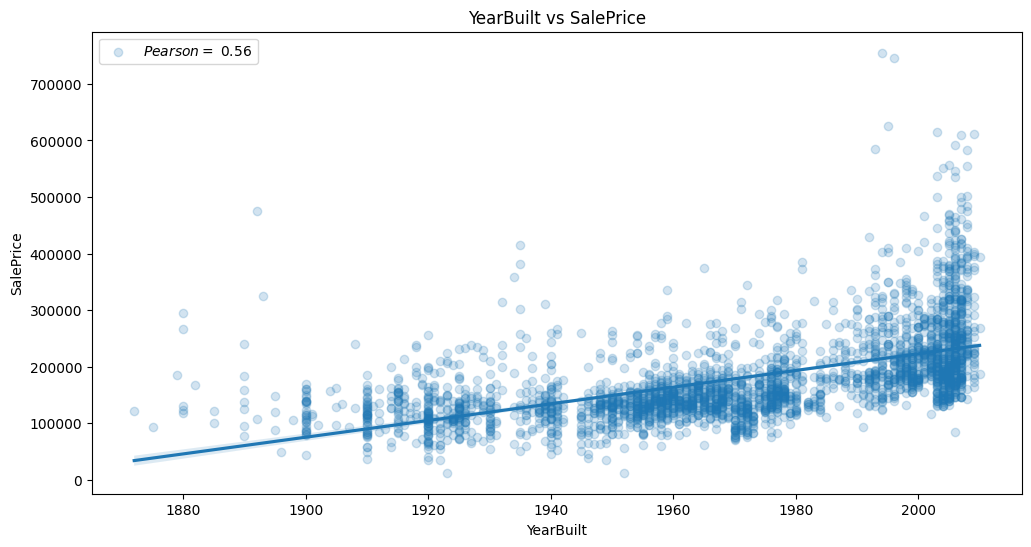

In [91]:
Pearson_YrBelt = 0.56
plt.figure(figsize=(12,6))
sns.regplot(data=data_w, x = "YearBuilt", y="SalePrice", scatter_kws={'alpha':0.2})
plt.title('YearBuilt vs SalePrice', fontsize = 12)
plt.legend(['$Pearson=$ {:.2f}'.format(Pearson_YrBelt)], loc = 'best')
plt.show()

# Data Processing

After finding the useful attributes, they need  to be preprocessed so that they can be used for modeling.

Main steps of preprocessing are:

1. Looking for potential NaN
2. Dealing with categorical features (e.g. Dummy coding?)
3. Normalisation

In [92]:
#Separating Target and Features
#Try and do this, but with only training and testing data. Try and omit the main Housing AMV data stuff
target =data_w['SalePrice']
test_id = test['Id']
#test = pd.read_csv("./test.csv")
test = test.drop(['Id'], axis = 1)
data_w2 = data_w.drop(['SalePrice','PID','Order'], axis=1)

#Concateenating train & trst set

train_test = pd.concat([data_w2,test], axis=0, sort=False)


In [93]:


# Looking at NaN % within the data
# This is quite useful, remember how to do this!

nan = pd.DataFrame(train_test.isna().sum(), columns = ['NaN_sum'])
nan['feat'] = nan.index
nan['Perc(%)'] = (nan['NaN_sum']/1460)*100
nan = nan[nan['NaN_sum'] > 0]
nan = nan.sort_values(by = ['NaN_sum'])
nan['Usability'] = np.where(nan['Perc(%)'] > 20, 'Discard', 'Keep')
nan



,NaN_sum,feat,Perc(%),Usability
Exterior1st,1,Exterior1st,0.068493,Keep
Exterior2nd,1,Exterior2nd,0.068493,Keep
KitchenQual,1,KitchenQual,0.068493,Keep
Electrical,1,Electrical,0.068493,Keep
SaleType,1,SaleType,0.068493,Keep
TotalBsmtSF,2,TotalBsmtSF,0.136986,Keep
GarageArea,2,GarageArea,0.136986,Keep
GarageCars,2,GarageCars,0.136986,Keep
Utilities,2,Utilities,0.136986,Keep
Functional,2,Functional,0.136986,Keep


In [94]:
# Converting non-numeric predictors stored as numbers into string
# But what is this for exactly?

for col in ['MSSubClass','YrSold','MoSold']:
    train_test[col] = train[col].apply(str)

# Filling Categorical NaN (That we know how to fill due to the description file )
# What does this do? How does it work?
train_test['Functional'] = train_test['Functional'].fillna('Typ')
train_test['Electrical'] = train_test['Electrical'].fillna("SBrkr")
train_test['KitchenQual'] = train_test['KitchenQual'].fillna("TA")

for col in ['Exterior1st','Exterior2nd','SaleType']:
    train_test[col] = train_test[col].fillna(train_test[col].mode()[0])

for col in ['PoolQC', 'Alley', 'FireplaceQu', 'Fence', 'MiscFeature']:
    train_test[col] = train_test[col].fillna("None")

for col in ('GarageArea', 'GarageCars'):
    train_test[col] = train_test[col].fillna(0)
        
for col in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']:
    train_test[col] = train_test[col].fillna('None')
    
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    train_test[col] = train_test[col].fillna('None')
    
    # Checking the features with NaN remained out

for col in train_test:
    if train_test[col].isna().sum() > 0:
        print(train_test[col][0])

0    60
0    60
Name: MSSubClass, dtype: object
0    RL
0    RH
Name: MSZoning, dtype: object
0    141.0
0     80.0
Name: LotFrontage, dtype: float64
0    AllPub
0    AllPub
Name: Utilities, dtype: object
0    1960.0
0       NaN
Name: YearRemod/Add, dtype: float64
0    Stone
0      NaN
Name: MasVnrType, dtype: object
0    112.0
0      0.0
Name: MasVnrArea, dtype: float64
0    639.0
0    468.0
Name: BsmtFinSF1, dtype: float64
0      0.0
0    144.0
Name: BsmtFinSF2, dtype: float64
0    441.0
0    270.0
Name: BsmtUnfSF, dtype: float64
0    1080.0
0     882.0
Name: TotalBsmtSF, dtype: float64
0    1.0
0    0.0
Name: BsmtFullBath, dtype: float64
0    0.0
0    0.0
Name: BsmtHalfBath, dtype: float64
0    1960.0
0    1961.0
Name: GarageYrBlt, dtype: float64
0    2
0    2
Name: MoSold, dtype: object
0    2008
0    2008
Name: YrSold, dtype: object
0       NaN
0    1961.0
Name: YearRemodAdd, dtype: float64


In [95]:
# Removing the useless variables

useless = ['GarageYrBlt','YearRemodAdd'] 
train_test = train_test.drop(useless, axis = 1)

# Imputing with KnnRegressor (we can also use different Imputers)

def impute_knn(df):
    ttn = df.select_dtypes(include=[np.number])
    ttc = df.select_dtypes(exclude=[np.number])

    cols_nan = ttn.columns[ttn.isna().any()].tolist()         # columns w/ nan 
    cols_no_nan = ttn.columns.difference(cols_nan).values     # columns w/n nan

    for col in cols_nan:
        imp_test = ttn[ttn[col].isna()]   # indicies which have missing data will become our test set
        imp_train = ttn.dropna(subset=[col])          # all indicies which which have no missing data 
        model = KNeighborsRegressor(n_neighbors=5)  # KNR Unsupervised Approach
        # use the elbow technique to go and find out the number of neighbours to use. Migt not be 5
        knr = model.fit(imp_train[cols_no_nan], imp_train[col])     #1st arg provies the features, 2nd arg is the target.
        #Revise K neighbours to get a better understanding as to how this works!
        ttn.loc[ttn[col].isna(), col] = knr.predict(imp_test[cols_no_nan])
    
    return pd.concat([ttn,ttc],axis=1)

# Note that this is using K neighbours to fill up missing data, quite cool
train_test = impute_knn(train_test)


objects = []
for i in train_test.columns:
    if train_test[i].dtype == object:
        objects.append(i)
train_test.update(train_test[objects].fillna('None'))

# # Checking NaN presence

for col in train_test:
    if train_test[col].isna().sum() > 0:
        print("NaN present")
        print(train_test[col][0])

# Feature Engineering

This is the part where new features are created by combining the ones we already have. This could help to increase the performance of the model if we can create a feature that is highly correlated to the Sales Price

In [100]:
train_test["SqFtPerRoom"] = train_test["GrLivArea"] / (train_test["TotRmsAbvGrd"] +
                                                       train_test["FullBath"] +
                                                       train_test["HalfBath"] +
                                                       train_test["KitchenAbvGr"])

train_test['Total_Home_Quality'] = train_test['OverallQual'] + train_test['OverallCond']

train_test['Total_Bathrooms'] = (train_test['FullBath'] + (0.5 * train_test['HalfBath']) +
                               train_test['BsmtFullBath'] + (0.5 * train_test['BsmtHalfBath']))

train_test["HighQualSF"] = train_test["1stFlrSF"] + train_test["2ndFlrSF"]

# Converting non-numeric predictors stored as numbers into string
# This is dont to make it clear that they are categorical variables, and would not be interpreted as ordinal variables which would lead to incorrect results
train_test['MSSubClass'] = train_test['MSSubClass'].apply(str)
train_test['YrSold'] = train_test['YrSold'].apply(str)
train_test['MoSold'] = train_test['MoSold'].apply(str)

# Creating dummy variables from categorical features
# Creates new columns and fills up with 1s or 0s, based on the category it has.
train_test_dummy = pd.get_dummies(train_test)

# Fetch all numeric features

#train_test['Id'] = train_test['Id'].apply(str)
numeric_features = train_test_dummy.dtypes[train_test_dummy.dtypes != object].index
#features with high skewness are likely to have more pronounced asymmetry in their distributions
skewed_features = train_test_dummy[numeric_features].apply(lambda x: skew(x)).sort_values(ascending=False)
high_skew = skewed_features[skewed_features > 0.5]
skew_index = high_skew.index
print("high Skew: ", high_skew)

# Normalize skewed features using log_transformation
    
for i in skew_index:
    train_test_dummy[i] = np.log1p(train_test_dummy[i])

high Skew:  KitchenQual_Po         66.226884
Utilities_NoSeWa       66.226884
Exterior2nd_Other      66.226884
MiscFeature_TenC       66.226884
RoofMatl_Metal         66.226884
                         ...    
Exterior2nd_VinylSd     0.639652
BsmtFullBath            0.628481
Exterior1st_VinylSd     0.628079
Total_Bathrooms         0.561452
OverallCond             0.532256
Length: 306, dtype: float64


C:\Users\NicholasTeng\AppData\Local\Temp\ipykernel_4156\906518178.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(target, kde = True, hist=True, fit = norm, ax = ax[1])
c:\Users\NicholasTeng\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\NicholasTeng\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a f

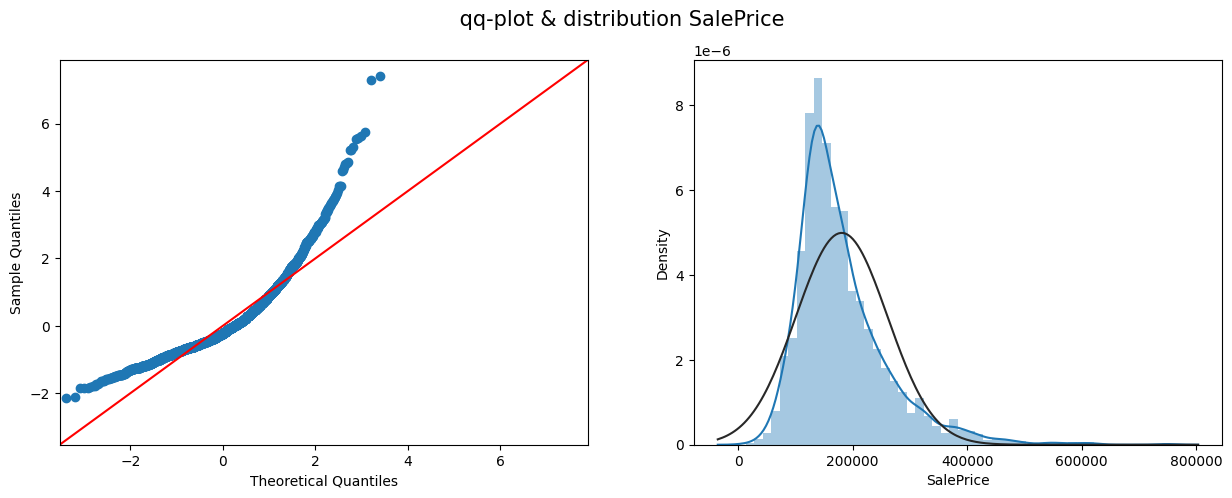

In [103]:
# SalePrice before transformation

fig, ax = plt.subplots(1,2, figsize= (15,5))
fig.suptitle(" qq-plot & distribution SalePrice ", fontsize= 15)
#I need to do furhter research into this, chatGPT isn't enough
sm.qqplot(target, stats.t, distargs=(4,),fit=True, line="45", ax = ax[0])



sns.distplot(target, kde = True, hist=True, fit = norm, ax = ax[1])
plt.show()

C:\Users\NicholasTeng\AppData\Local\Temp\ipykernel_4156\438365683.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(target_log, kde = True, hist=True, fit = norm, ax = ax[1])
c:\Users\NicholasTeng\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\NicholasTeng\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in

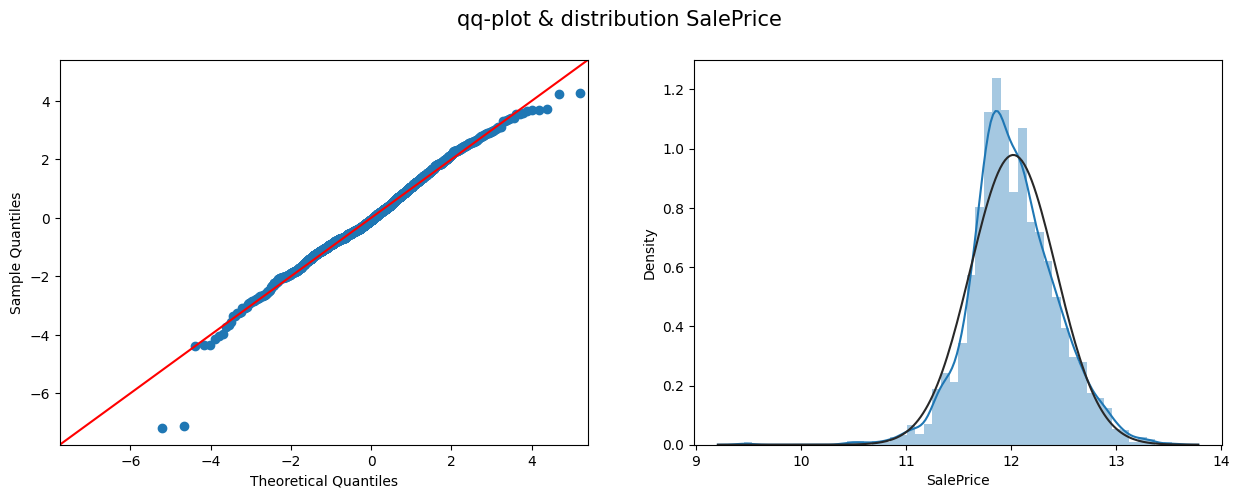

In [104]:
# SalePrice after transformation

target_log = np.log1p(target)

fig, ax = plt.subplots(1,2, figsize= (15,5))
fig.suptitle("qq-plot & distribution SalePrice ", fontsize= 15)

sm.qqplot(target_log, stats.t, distargs=(4,),fit=True, line="45", ax = ax[0])
sns.distplot(target_log, kde = True, hist=True, fit = norm, ax = ax[1])
plt.show()

#Check for skewness after doing log transformation